
# Proje adı: Tokyo 2020 Olympic Medals

# Proje Amacı:  
**burada bu çalışmada, olimpiyat madalyası kazananları tahmin ediliyor. Altın, Gümüş ve Bronz madalya sayısı da farklı makine öğrenimi modelleri kullanılarak tahmin ediliyor. Ve bir sonraki Olimpiyatlarda ilk 10 ülkenin sırasını veya performansını tahmin ediyor.**


# Verinin açıklanması:
**kullanan veri 93 satır ve 6 sütündan oluşmakta. değişkenler ise Country, Gold Medal, Silver Medal, Bronze Medal, Total and Ranked By Total bunlar dir.**

# Kullanan Büyük veri platformları: 
**Projede spark platformu ve farklı python kütüphaneler kullanılmıştır. Model için sample K-Fold ve Sk-learn Linear Regration kullandı.**

**Python da: numpy, pandas, matplotlib, seaborn, StandardScaler, statsmodels.formula.api.**


# Projenin açıklaması:
**Olimpiyat oyunları, yaz ve kış oyunları olmak üzere dört yılda bir düzenleniyor ve her olimpiyat oyununa farklı bir ülke ev sahipliği yapıyor. Her spor müsabakasında kazananlara 1.ye Altın, 2.ye Gümüş ve 3.ye bronz madalya verilir. burada bu çalışmada, olimpiyat madalyası kazananları tahmin ediliyor. Altın, Gümüş ve Bronz madalya sayısı da farklı makine öğrenimi modelleri kullanılarak tahmin ediliyor. Ve bir sonraki Olimpiyatlarda ilk 10 ülkenin sırasını veya performansını tahmin ediyor. Bu proje, kullanıcıların bu uygulamayı kullanarak bahis oyunlarında yardımcı olacak, kullanıcı Olimpiyat oyunlarının doğru galibini konuk edebilir ve bahsi kazanabilir.**

# Projenin çıktıları: 

## **Setup**

In [1]:
import math
import pandas as pd
import numpy as np 
import seaborn as sns
import os
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=ad30797094b74387820c4c836cbce2fae6a611862baea2e2acb70a1930d9501d
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/CSV_file/Tokyo Medals 2021.csv'
df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of                        Country  Gold Medal  Silver Medal  Bronze Medal  Total  \
0     United States of America          39            41            33    113   
1   People's Republic of China          38            32            18     88   
2                        Japan          27            14            17     58   
3                Great Britain          22            21            22     65   
4                          ROC          20            28            23     71   
..                         ...         ...           ...           ...    ...   
88                       Ghana           0             0             1      1   
89                     Grenada           0             0             1      1   
90                      Kuwait           0             0             1      1   
91         Republic of Moldova           0             0             1      1   
92        Syrian Arab Republic           0             0             1     

In [4]:
os.getcwd()

'/content'

# Explore datasets




In [5]:
df.head(10)

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7


In [6]:
df.shape

(93, 6)

In [7]:
df.isnull().sum()

Country          0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank By Total    0
dtype: int64

**- Check null values**

In [8]:
nan_values = df.isna()
nan_columns= nan_values.any()
nan_columns

Country          False
Gold Medal       False
Silver Medal     False
Bronze Medal     False
Total            False
Rank By Total    False
dtype: bool

In [9]:
df.info

<bound method DataFrame.info of                        Country  Gold Medal  Silver Medal  Bronze Medal  Total  \
0     United States of America          39            41            33    113   
1   People's Republic of China          38            32            18     88   
2                        Japan          27            14            17     58   
3                Great Britain          22            21            22     65   
4                          ROC          20            28            23     71   
..                         ...         ...           ...           ...    ...   
88                       Ghana           0             0             1      1   
89                     Grenada           0             0             1      1   
90                      Kuwait           0             0             1      1   
91         Republic of Moldova           0             0             1      1   
92        Syrian Arab Republic           0             0             1      1

In [10]:

df.columns

Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Rank By Total'],
      dtype='object')

# **Data Analysis...**



**- Leading Contries...**

In [11]:
leading= df.sort_values("Rank By Total", ascending = True)
leading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
...,...,...,...,...,...,...
76,Bahrain,0,1,0,1,77
62,Bermuda,1,0,0,1,77
63,Morocco,1,0,0,1,77
81,Turkmenistan,0,1,0,1,77


**- Gold Medal**

In [12]:
goldLeading = df.sort_values("Gold Medal", ascending = False)
goldLeading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
68,Armenia,0,2,2,4,47
67,Dominican Republic,0,3,2,5,42
66,Azerbaijan,0,3,4,7,33
65,Colombia,0,4,1,5,42


**- Silver Medals**

In [13]:
silverLeading = df.sort_values("Silver Medal", ascending = False)
silverLeading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
2,Japan,27,14,17,58,5
...,...,...,...,...,...,...
41,Bahamas,2,0,0,2,66
40,Qatar,2,0,1,3,60
39,Israel,2,0,2,4,47
38,Ireland,2,0,2,4,47


**- Bronze Medal**

In [14]:

bronzeLeading = df.sort_values("Bronze Medal", ascending = False)
bronzeLeading

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
4,ROC,20,28,23,71,3
3,Great Britain,22,21,22,65,4
5,Australia,17,7,22,46,6
9,Italy,10,10,20,40,7
...,...,...,...,...,...,...
76,Bahrain,0,1,0,1,77
51,South Africa,1,2,0,3,60
57,Tunisia,1,1,0,2,66
62,Bermuda,1,0,0,1,77


# **Which contries have more than 15 Gold medals**

In [15]:
filter=df["Gold Medal"]>15
filtringData=df[filter]
filtringData

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6


# **Filter for spacific country**

In [16]:
filterSpacificCountry=df["Country"].str.contains("Turkey")
filtringData2=df[filterSpacificCountry]
filtringData2

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
34,Turkey,2,2,9,13,20


#**data Visualization**

In [17]:
plt.style.use("ggplot")

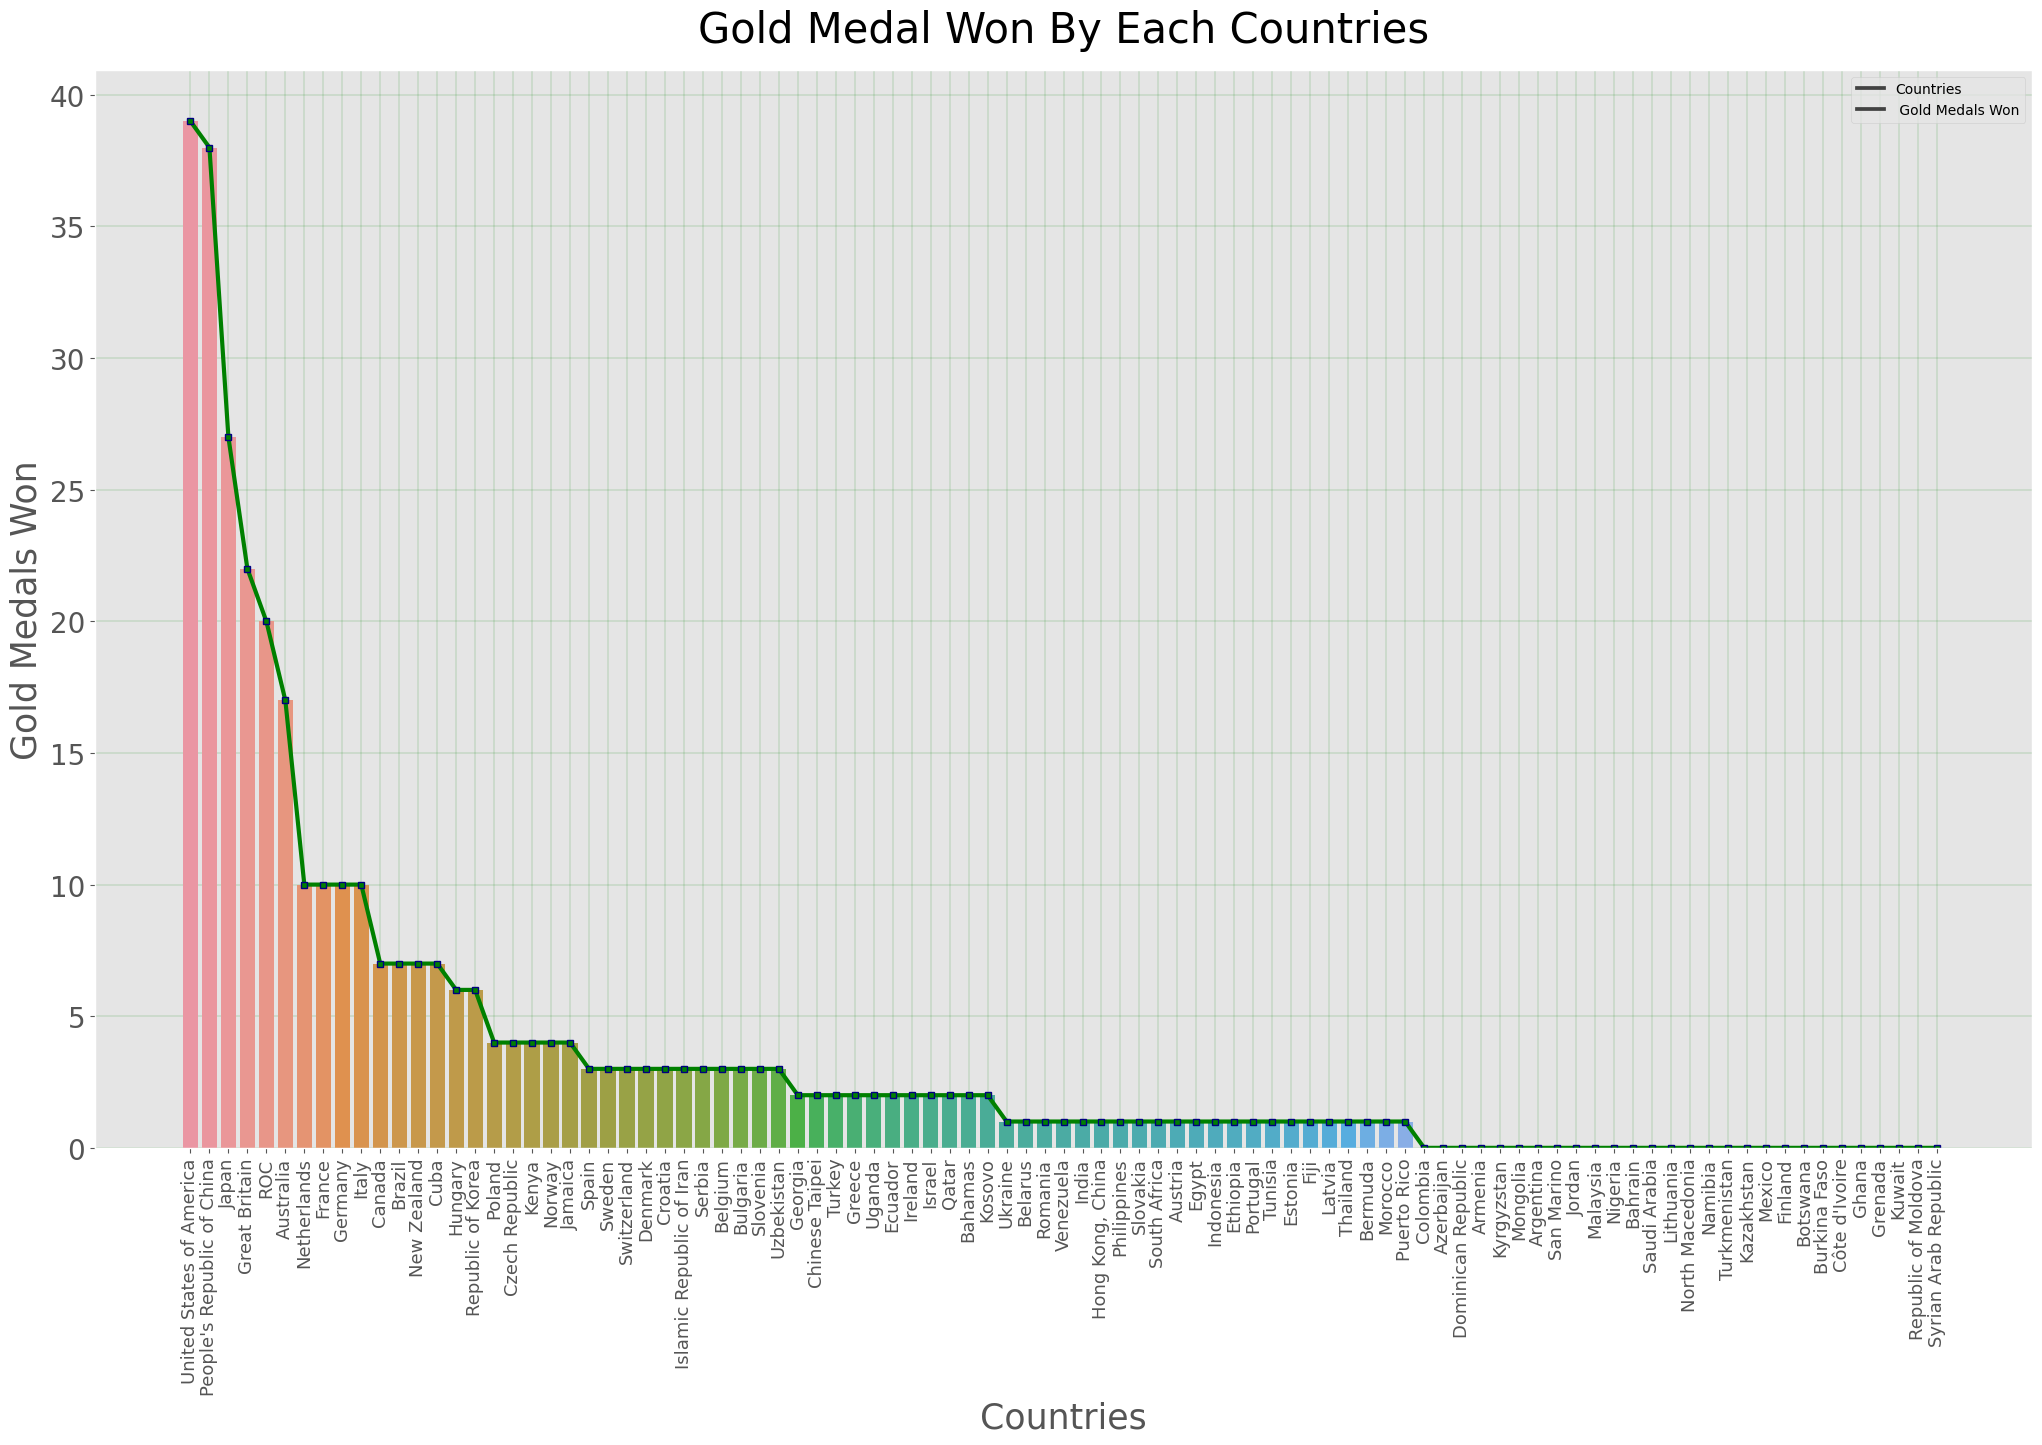

In [18]:
plt.figure(figsize=(25,14))
sns.barplot(x='Country', y='Gold Medal', data=df)
plt.plot(df.Country,df['Gold Medal'], marker='s', c='g', ls='-', lw= 3, ms=5, mew=1, mec='navy');
plt.tick_params(axis='x',which='major',labelsize=13,rotation=90)
plt.tick_params(axis='y',which='major',labelsize=20)
plt.title("Gold Medal Won By Each Countries",fontsize=30,pad=20)
plt.xlabel("Countries",fontsize=25)
plt.ylabel("Gold Medals Won",fontsize=25)
plt.legend(['Countries',' Gold Medals Won']);
plt.grid(color='g',linestyle='-',linewidth=0.3,alpha=0.5)

In [19]:
plt.style.use("ggplot")

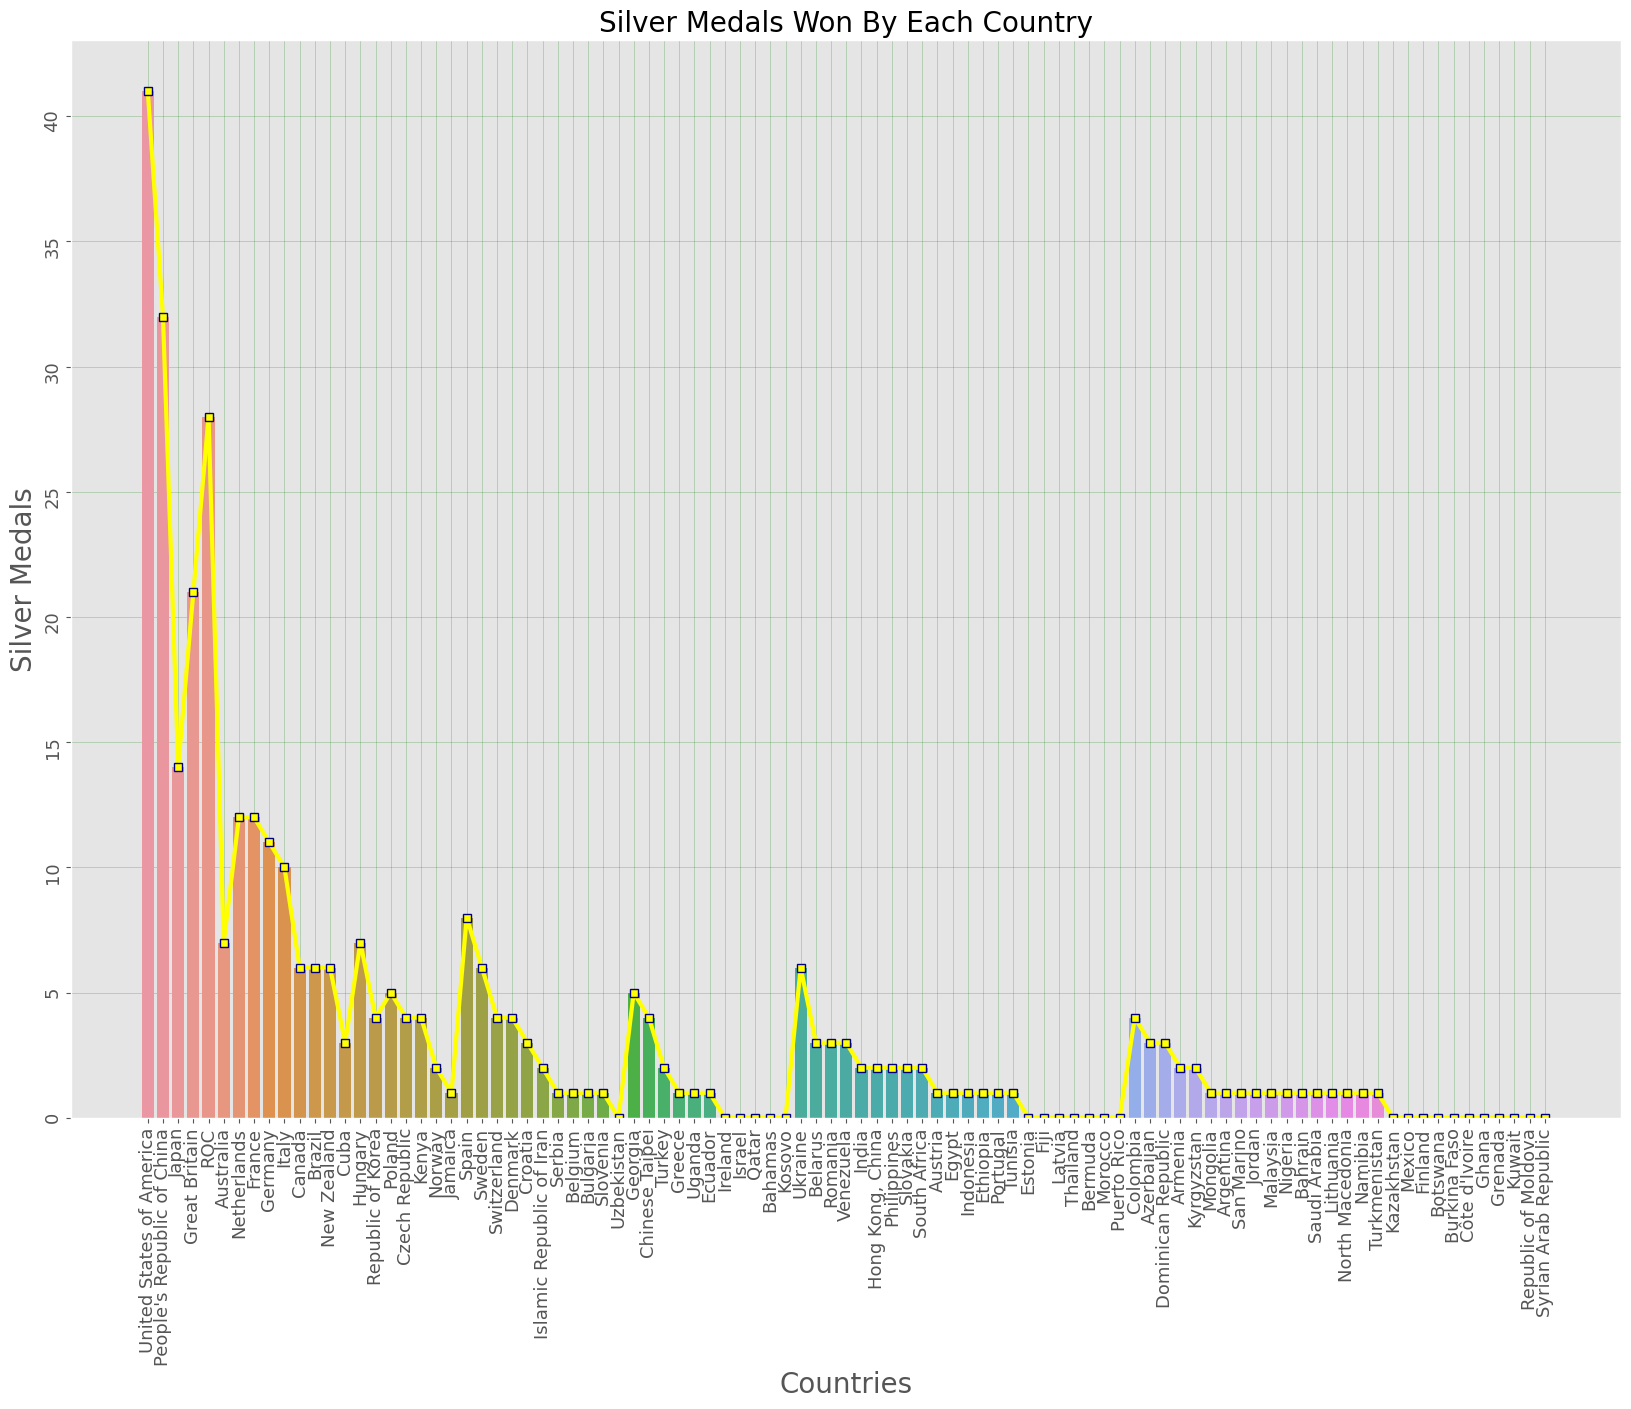

In [20]:
plt.figure(figsize=(20,14))
sns.barplot(x='Country', y='Silver Medal', data= df)
plt.plot(df.Country, df["Silver Medal"], marker="s", color="yellow", ls="-", linewidth=3, mew=1, mec="navy");
plt.tick_params(axis='x', which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which= "major", labelsize=13, rotation=90)
plt.title("Silver Medals Won By Each Country", fontsize=20)
plt.xlabel("Countries", fontsize=20)
plt.ylabel("Silver Medals", fontsize=20)
plt.grid(color="g", linestyle="-", linewidth=.5, alpha=.3)


In [21]:
plt.style.use("ggplot")

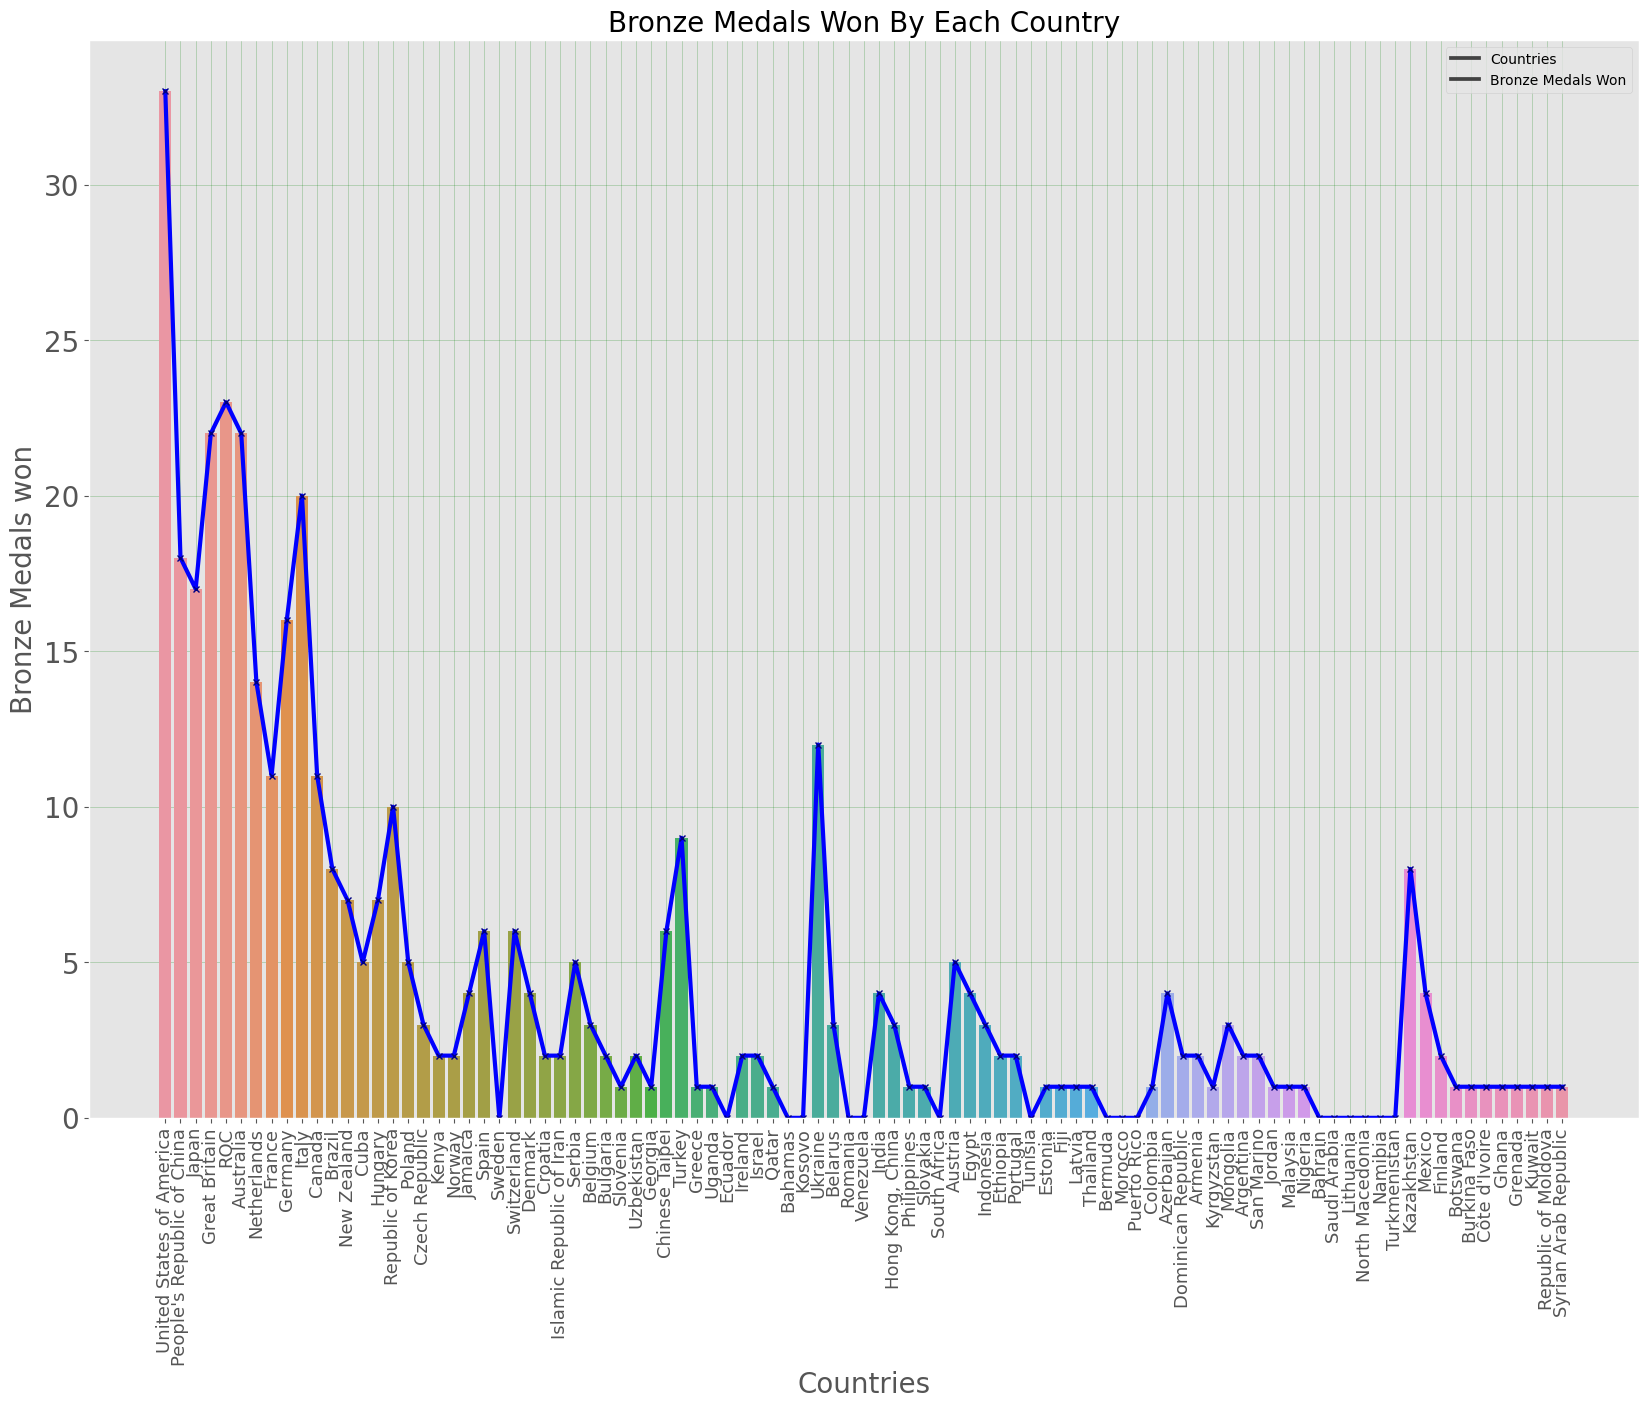

In [22]:
plt.figure(figsize=(20,14))
sns.barplot(x='Country', y='Bronze Medal', data= df)
plt.plot(df.Country, df["Bronze Medal"], marker="x", color="b", ls="-", linewidth=3, ms=5, mew=1, mec="navy");
plt.tick_params(axis='x', which="major", labelsize=13, rotation=90)
plt.tick_params(axis="y", which= "major", labelsize=20)
plt.title("Bronze Medals Won By Each Country", fontsize=20)
plt.xlabel("Countries", fontsize=20)
plt.ylabel("Bronze Medals won", fontsize=20)
plt.legend(["Countries", "Bronze Medals Won"])
plt.grid(color="g", linestyle="-", linewidth=.5, alpha=.3)

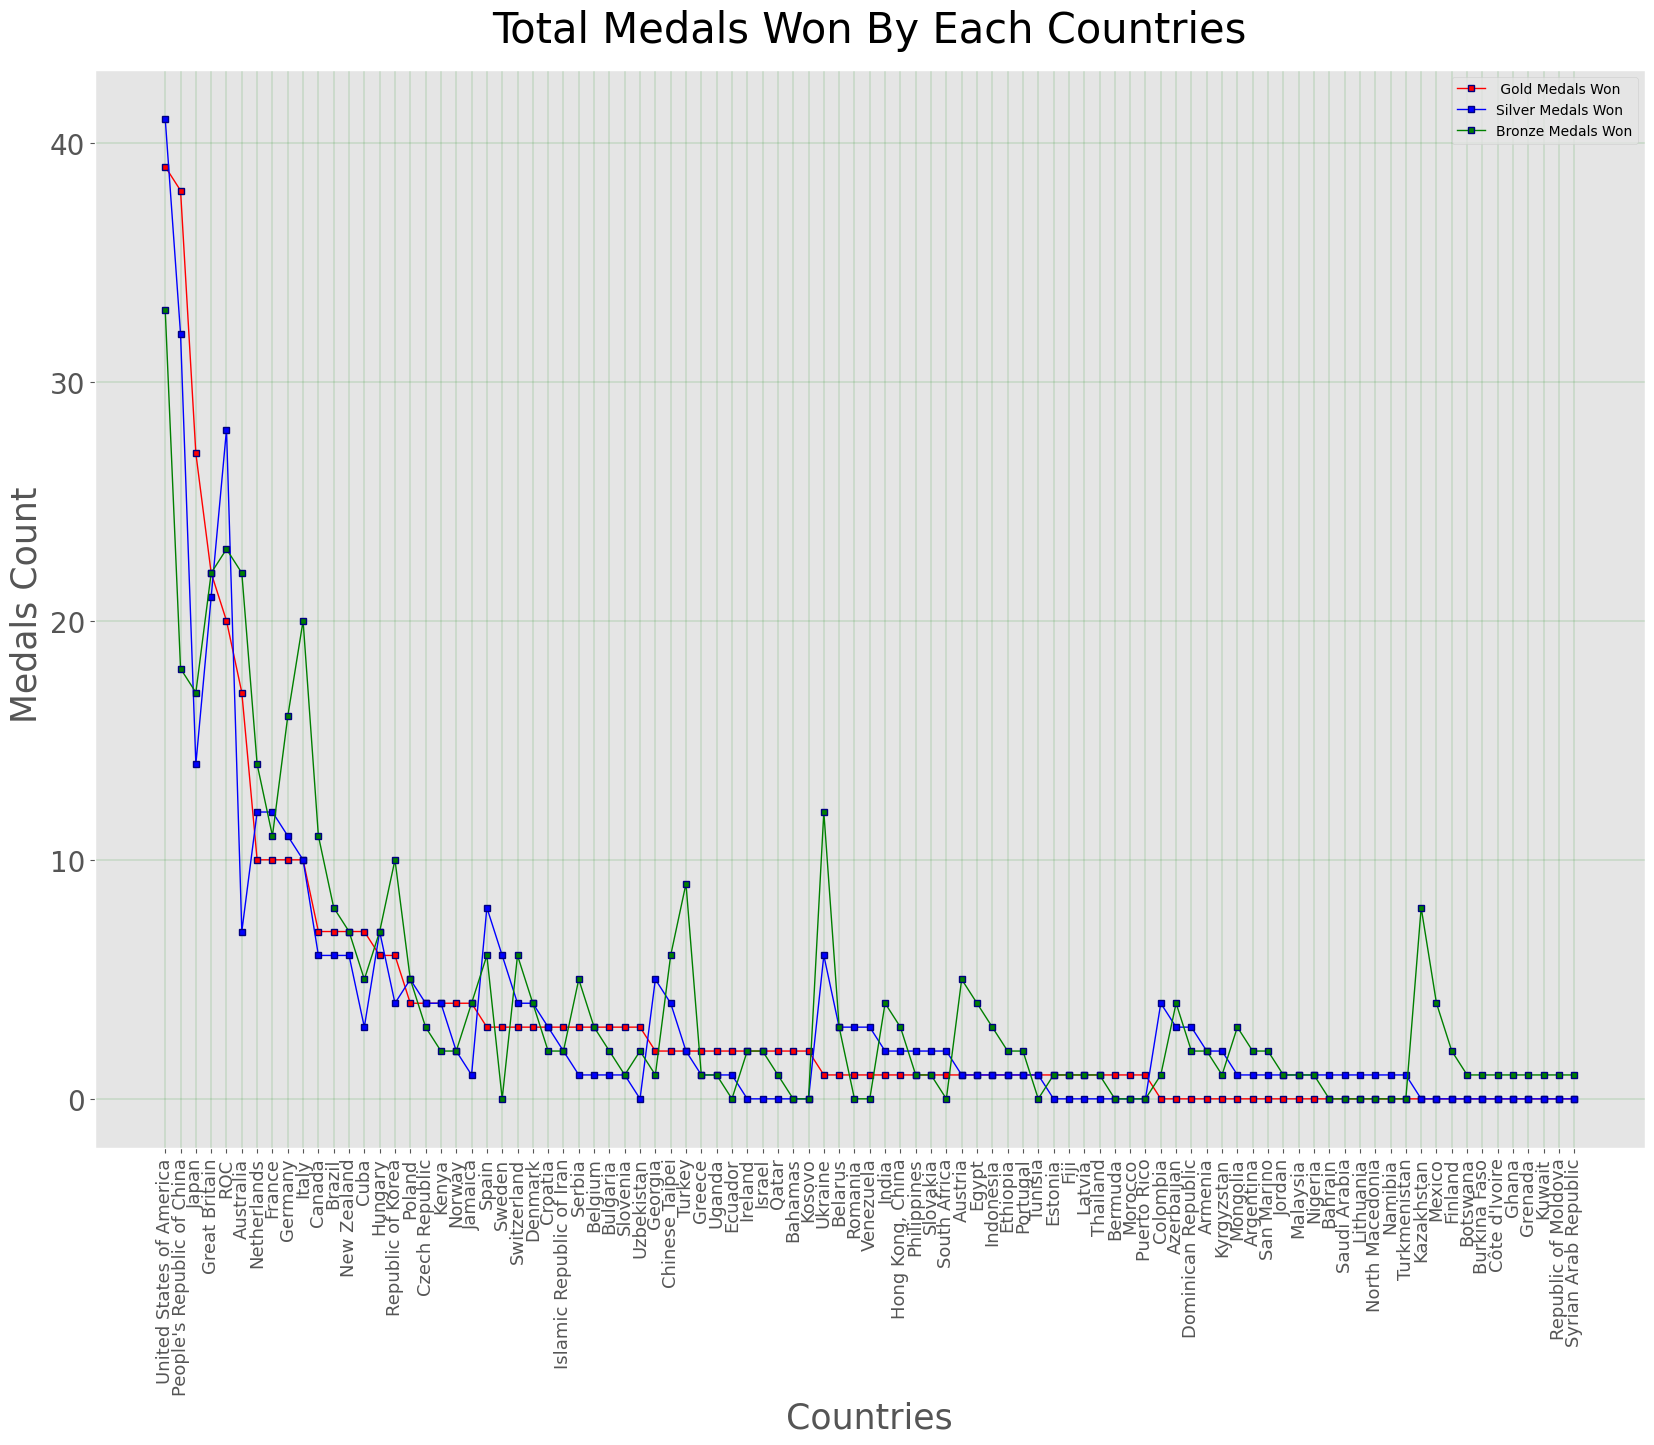

In [23]:
plt.figure(figsize=(20,14))
plt.plot(df.Country,df["Gold Medal"],marker='s',c='r',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.plot(df.Country,df["Silver Medal"],marker='s',c='b',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.plot(df.Country,df["Bronze Medal"],marker='s',c='g',ls='-',lw=1,ms=4,mew=1,mec='navy');
plt.tick_params(axis='x',which='major',labelsize=13,rotation=90)
plt.tick_params(axis='y',which='major',labelsize=20)
plt.title("Total Medals Won By Each Countries",fontsize=30,pad=20)
plt.xlabel("Countries",fontsize=25)
plt.ylabel(" Medals Count",fontsize=25)
plt.legend([' Gold Medals Won','Silver Medals Won','Bronze Medals Won']);
plt.grid(color='g',linestyle='-',linewidth=0.3,alpha=0.5)

# **Who are the top 10 countries by total medals in tokyo 2020 olympic that has the most gold or silver or bronze medals? how many are their medals??**

**- Top 10 contries that has the most gold medals in Tokyo olympic 2020**

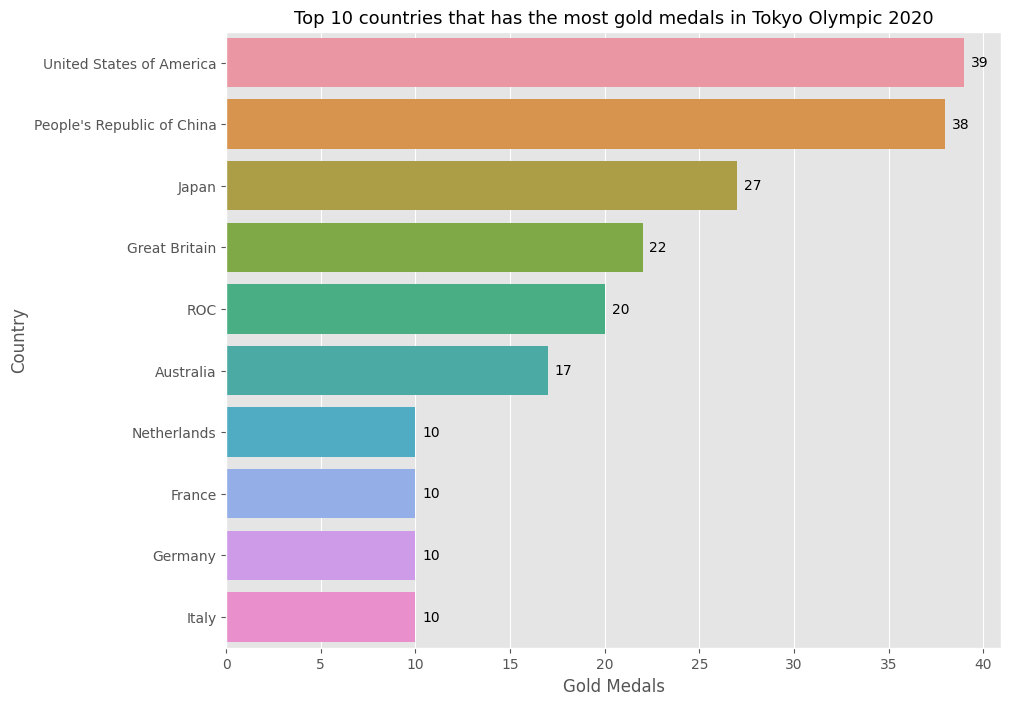

In [24]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 countries that has the most gold medals in Tokyo Olympic 2020', size = 13)
bplot = sns.barplot(x = df['Gold Medal'], y = df['Country'], order = df.sort_values('Gold Medal', ascending = False)['Country'].iloc[:10])
for p in bplot.patches:
    bplot.annotate("%.0f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2), (5, 0), 
                   textcoords = 'offset points', ha = 'left', va = 'center')

plt.xlabel('Gold Medals', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.show()

**- Top 10 countries that has the most silver medals in Tolkyo Olympic 2020**

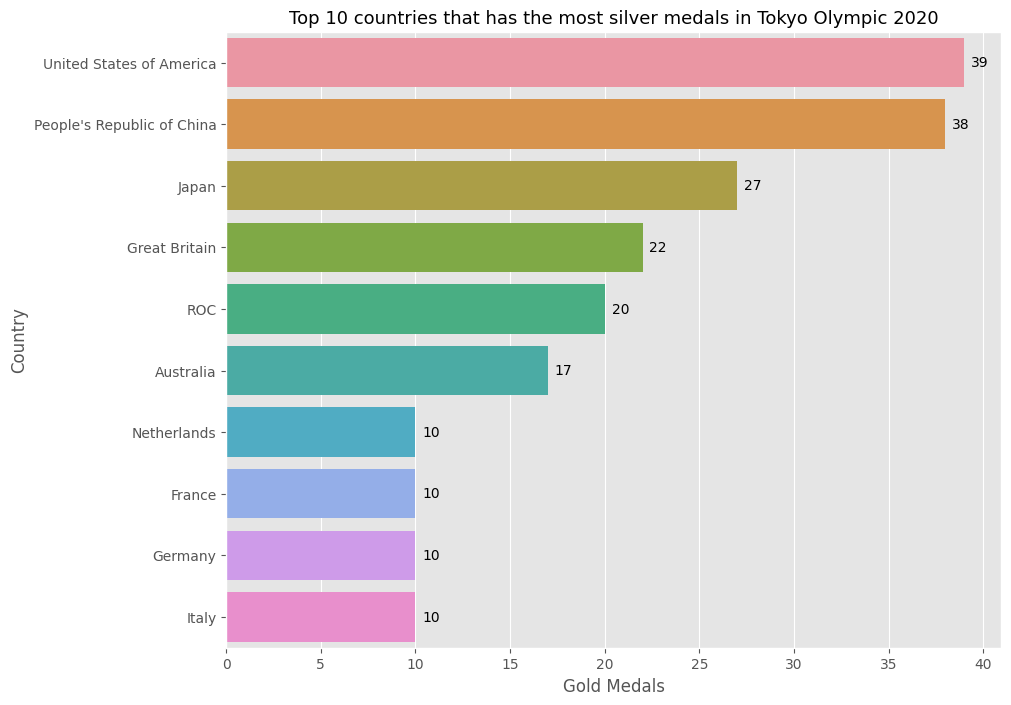

In [25]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 countries that has the most silver medals in Tokyo Olympic 2020', size = 13)
bplot = sns.barplot(x = df['Gold Medal'], y = df['Country'], order = df.sort_values('Gold Medal', ascending = False)['Country'].iloc[:10])
for p in bplot.patches:
    bplot.annotate("%.0f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2), (5, 0), 
                   textcoords = 'offset points', ha = 'left', va = 'center')

plt.xlabel('Gold Medals', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.show()

**- Top 10 countries that has the most bronze medals in Tokyo Olympic 2020**

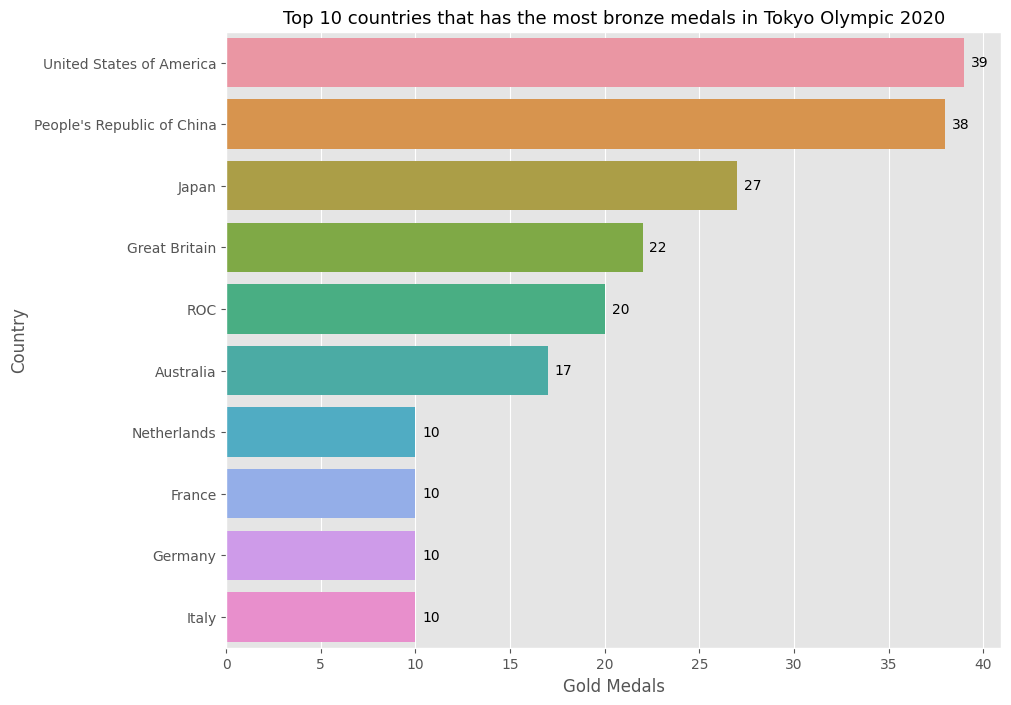

In [26]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 countries that has the most bronze medals in Tokyo Olympic 2020', size = 13)
bplot = sns.barplot(x = df['Gold Medal'], y = df['Country'], order = df.sort_values('Gold Medal', ascending = False)['Country'].iloc[:10])
for p in bplot.patches:
    bplot.annotate("%.0f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2), (5, 0), 
                   textcoords = 'offset points', ha = 'left', va = 'center')

plt.xlabel('Gold Medals', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.show()

**- Top 10 countries that has the most medals in Tokyo olympic 2020**

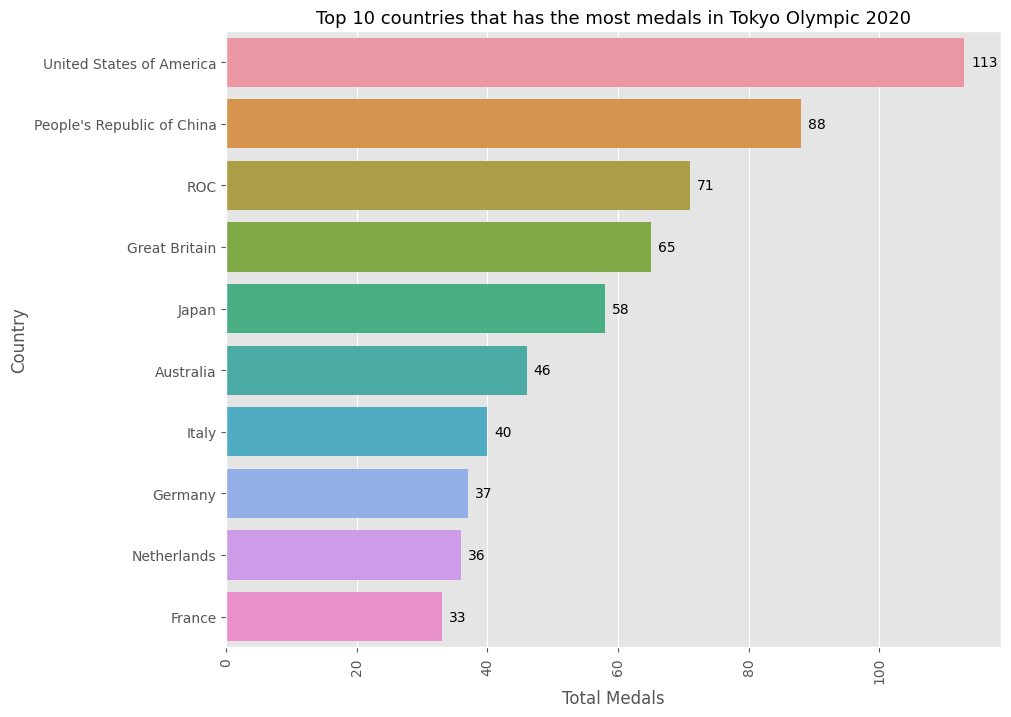

In [27]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 countries that has the most medals in Tokyo Olympic 2020', size = 13)
bplot = sns.barplot(y = df['Country'], x = df['Total'], order = df.sort_values('Total', ascending = False)['Country'].iloc[:10])
for p in bplot.patches:
    bplot.annotate("%.0f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2), (5, 0), 
                   textcoords = 'offset points', ha = 'left', va = 'center')
    
plt.xlabel('Total Medals', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

# **Split data to X and Y array**

In [30]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


#Second way....
x = df.drop('Rank By Total', axis=1)
y = df['Rank By Total']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

x.shape, y.shape

((93, 5), (93,))

# **Splitting the data in to trianingData and testData**

In [31]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


x = df.drop('Rank By Total', axis=1)
y = df['Rank By Total']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (69, 5)
Training Labels Shape: (69,)
Testing Features Shape: (24, 5)
Testing Labels Shape: (24,)


In [118]:

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (69, 97)
Training Labels Shape: (69,)
Testing Features Shape: (24, 97)
Testing Labels Shape: (24,)


In [34]:
x

,Country,Gold Medal,Silver Medal,Bronze Medal,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
...,...,...,...,...,...
88,Ghana,0,0,1,1
89,Grenada,0,0,1,1
90,Kuwait,0,0,1,1
91,Republic of Moldova,0,0,1,1


In [35]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Country']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot,categorical_features)],remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<93x97 sparse matrix of type '<class 'numpy.float64'>'
	with 396 stored elements in Compressed Sparse Row format>

In [73]:
pd.DataFrame(transformed_x)

,0
0,"(0, 90)\t1.0\n (0, 93)\t39.0\n (0, 94)\t41..."
1,"(0, 64)\t1.0\n (0, 93)\t38.0\n (0, 94)\t32..."
2,"(0, 45)\t1.0\n (0, 93)\t27.0\n (0, 94)\t14..."
3,"(0, 33)\t1.0\n (0, 93)\t22.0\n (0, 94)\t21..."
4,"(0, 70)\t1.0\n (0, 93)\t20.0\n (0, 94)\t28..."
...,...
88,"(0, 32)\t1.0\n (0, 95)\t1.0\n (0, 96)\t1.0"
89,"(0, 35)\t1.0\n (0, 95)\t1.0\n (0, 96)\t1.0"
90,"(0, 50)\t1.0\n (0, 95)\t1.0\n (0, 96)\t1.0"
91,"(0, 72)\t1.0\n (0, 95)\t1.0\n (0, 96)\t1.0"


In [37]:
dummies = pd.get_dummies(df[["Country"]])
dummies

,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Belarus,Country_Belgium,Country_Bermuda,...,Country_Syrian Arab Republic,Country_Thailand,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United States of America,Country_Uzbekistan,Country_Venezuela
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# re-fit the model...
#build machine learning model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#required for parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##model = RandomForestRegressor()
np.random.seed(42)

# Split x,y...

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size= 0.5)
# Instantiate model with 1000 decision trees
RandomModel = RandomForestRegressor(n_estimators = 2600, random_state =3000)
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
"max_depth": [None, 5, 10, 20, 30],
"max_features": ["auto", "sqrt"],
"min_samples_split": [2,4,6],
"min_samples_leaf": [1, 2, 4]}



#Fit the model to the data(training the machine learning the model has)
RandomModel.fit(x_train, y_train)

RandomForestRegressor(n_estimators=2600, random_state=3000)

# **Builging and Training The Model**

In [39]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor
#required for parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##model = RandomForestRegressor()
np.random.seed(42)
# Split data after converting string to integer...
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size= 0.5)

# Instantiate model with 1000 decision trees
RandomModel = RandomForestRegressor(n_estimators = 2500, random_state =3000)
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
"max_depth": [None, 5, 10, 20, 30],
"max_features": ["auto", "sqrt"],
"min_samples_split": [2,4,6],
"min_samples_leaf": [1, 2, 4]}


#Fit the model 
RandomModel.fit(x_train, y_train)

RandomForestRegressor(n_estimators=2500, random_state=3000)

In [40]:

RandomModel.score(x_test, y_test)

0.9941508789022773

In [41]:
RandomModel.predict(x_test)

array([60.6224, 26.4252, 47.2752, 60.6676,  3.598 , 35.1928, 47.266 ,
       43.8432, 14.6752, 34.8628, 46.2288, 47.37  , 77.    , 76.9868,
       15.2592,  4.2016, 26.6288, 34.602 , 47.3536, 43.2172, 17.3988,
       47.2764, 76.9932, 43.7832, 23.072 , 15.2384, 34.3924, 60.6036,
       43.6976, 76.9932,  7.7528, 46.5544,  8.278 , 65.8768, 34.6856,
       21.9536, 47.4044, 22.7264, 10.0136, 76.9932, 27.8656, 30.0728,
       76.9932, 30.2804, 38.404 , 21.258 , 24.4156])

In [42]:
#Compare prediction to truth labels to evaluate the model...
y_preds =RandomModel.predict(x_test)
np.mean(y_preds == y_test)

#print(y_preds)

0.02127659574468085

In [43]:
RandomModel.score(x_test, y_test)

0.9941508789022773

In [44]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_preds)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_preds})
df

,Actual,Predicted
40,60,60.6224
22,26,26.4252
55,47,47.2752
72,60,60.6676
0,1,3.5980
26,33,35.1928
39,47,47.2660
67,42,43.8432
10,11,14.6752
44,33,34.8628


In [45]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

Mean Absolute Error: 1.259710638297872
Mean Squared Error: 2.787274342127661
Root Mean Squared Error: 1.6695132051372523


In [46]:
# Calculate the absolute errors
errors = abs(y_preds - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.26 degrees.
Accuracy: 87.32 %.


# Saved and laod model as pkl file

In [48]:
import pickle
import shutil
# Save the model as a pickle file
with open('random_forest_model.pkl', 'wb') as file:
  pickle.dump(RandomModel, file)

#Move the pickle file to Google Drive
shutil.move('random_forest_model.pkl', '/content/random_forest_model.pkl')


'/content/random_forest_model.pkl'

In [49]:
# Load the model from the pickle file
with open('/content/random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

loaded_model.predict(x_test)

array([60.6224, 26.4252, 47.2752, 60.6676,  3.598 , 35.1928, 47.266 ,
       43.8432, 14.6752, 34.8628, 46.2288, 47.37  , 77.    , 76.9868,
       15.2592,  4.2016, 26.6288, 34.602 , 47.3536, 43.2172, 17.3988,
       47.2764, 76.9932, 43.7832, 23.072 , 15.2384, 34.3924, 60.6036,
       43.6976, 76.9932,  7.7528, 46.5544,  8.278 , 65.8768, 34.6856,
       21.9536, 47.4044, 22.7264, 10.0136, 76.9932, 27.8656, 30.0728,
       76.9932, 30.2804, 38.404 , 21.258 , 24.4156])

### Converting Random forest model to Json format

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import joblib

# Load the Random Forest model from the pickle file
model = joblib.load('/content/random_forest_model.pkl')


In [51]:
import json
import numpy as np
from sklearn.tree import _tree

# Load the Random Forest model from the pickle file
model = joblib.load('/content/random_forest_model.pkl')

# Convert a single DecisionTreeRegressor to a JSON-serializable dictionary
def tree_to_dict(tree):
    tree_dict = {
        'children_left': tree.children_left.tolist(),
        'children_right': tree.children_right.tolist(),
        'feature': tree.feature.tolist(),
        'threshold': tree.threshold.tolist(),
        'value': tree.value.tolist(),
        'impurity': tree.impurity.tolist(),
    }
    return tree_dict

# Convert model attributes to JSON-compatible format
model_json = {
    'estimators': [],
    'feature_importances': model.feature_importances_.tolist(),
    # Include other necessary model attributes
}

# Convert each DecisionTreeRegressor in the ensemble to dictionary format
for estimator in model.estimators_:
    estimator_dict = tree_to_dict(estimator.tree_)
    model_json['estimators'].append(estimator_dict)

# Save the model as a JSON file
with open('/content/random_forest_model.json', 'w') as file:
    json.dump(model_json, file)



## converting Random forest model ot TessorFolwLite

SECOND WAY...

In [117]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 
logistic_model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size= 0.25)

# Training the model on the training data and labels
logistic_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Using the model to predict the labels of the test data
y_pred = logistic_model.predict(x_test)
np.mean(y_pred == y_test)

0.2916666666666667

In [ ]:
#Evaluate the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [ ]:
#Printing the result...
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 29.166666666666668
Confusion Matrix
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 2 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


In [ ]:
#Improving model...
logistic_Model = LogisticRegression(random_state=1234)
logistic_Model.fit(x_train, y_train)      

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1234)

In [ ]:
y_predicted = logistic_Model.predict(x_test)
print(y_predicted)     

[33 47 77 47 66  6  8 29 47 29 66 77 26 77 77 47 29 47 47 66 47 29 77 47]


In [ ]:
#required to evaluate the result
from sklearn.metrics import classification_report
print("Classification Report is: \n",classification_report(y_test, y_predicted))

Classification Report is: 
               precision    recall  f1-score   support

           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         3
          42       0.00      0.00      0.00         2
          47       0.12      0.50      0.20         2
          66       0.67      0.40      0.50         5
          77       0.80      1.00      0.89         4

    accuracy                           0.29        24
   macro avg       0.11      0.13      0.11        2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [116]:
parameter_grid_logistic_regression = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      # Number of iterations
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   # Algorithm to use for optimization
    'class_weight': ['balanced']                                    # Troubleshoot unbalanced data sampling
} 

In [ ]:
#required for grahical representation purpose
from sklearn.metrics import roc_curve, auc

#required for parameter tuning
from sklearn.model_selection import GridSearchCV

logistic_Model_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=parameter_grid_logistic_regression, verbose=1, 
                    cv=10, n_jobs=-1)
 
logistic_Model_grid.fit(x_train, y_train)
 
print("Best score for the model after tuning is: ",logistic_Model_grid.best_score_)
print("Best parameters for the model is :",logistic_Model_grid.best_estimator_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best score for the model after tuning is:  0.0
Best parameters for the model is : LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1234,
                   solver='saga')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test,y_predicted)*100
#Printing the result...
print("Accuracy is",accuracy)

Accuracy is 29.166666666666668
